In [ ]:
from sentinelsat import SentinelAPI
from datetime import date

In [ ]:
# api = SentinelAPI('admin', 'password', 'https://apihub.copernicus.eu/apihub')
api = SentinelAPI(None, None)

In [ ]:
# footprint = geojson_to_wkt(read_geojson('malopolska.geojson'))

def getQuery(down_left, top_right, start_date, end_date):
    footprint = "POLYGON(("
    footprint += down_left[0] + " " + down_left[1] + ","
    footprint += down_left[0] + " " + top_right[1] + ","
    footprint += top_right[0] + " " + top_right[1] + ","
    footprint += top_right[0] + " " + down_left[1] + ","
    footprint += down_left[0] + " " + down_left[1]
    footprint += "))"

    return api.query(footprint,
                    date=(start_date, end_date),
                    platformname='Sentinel-2',
                    processinglevel='Level-2A',
                    cloudcoverpercentage=(0, 20))


In [ ]:
products = getQuery(("19.792557", "50.004650"), ("20.102234", "50.107368"), date(2022, 1, 1), date(2022, 1, 31)) # Kraków from January

# examples:
# products = getQuery(("19.792557", "50.004650"), ("20.102234", "50.107368"), date(2020, 1, 1), date(2022, 1, 1))
# products = getQuery(("19.792557", "50.004650"), ("20.102234", "50.107368"), date(2000, 1, 1), "NOW")
# products = getQuery(("19.792557", "50.004650"), ("20.102234", "50.107368"), "NOW-5DAYS", "NOW")

In [ ]:
products_df = api.to_dataframe(products)
products_df

In [ ]:
# download all results from the search
api.download_all(products)

In [3]:
import rasterio

In [4]:
dataset = rasterio.open('S2A_MSIL2A_20220109T094401_N0301_R036_T34UDA_20220109T121235.SAFE/GRANULE/L2A_T34UDA_A034210_20220109T094357/IMG_DATA/R10m/T34UDA_20220109T094401_B03_10m.jp2')
dataset2 = rasterio.open('S2A_MSIL2A_20220109T094401_N0301_R036_T34UDA_20220109T121235.SAFE/GRANULE/L2A_T34UDA_A034210_20220109T094357/IMG_DATA/R10m/T34UDA_20220109T094401_B08_10m.jp2')

array([[ 839, 1574, 1180, ...,  739,  788,  908],
       [ 890, 1168,  992, ...,  962,  745,  995],
       [1078,  902,  722, ..., 1400, 1116, 1356],
       ...,
       [ 742,  965,  601, ...,  805,  781,  918],
       [ 545,  766,  540, ...,  791,  858,  960],
       [ 513,  545,  406, ...,  876,  938,  956]], dtype=uint16)

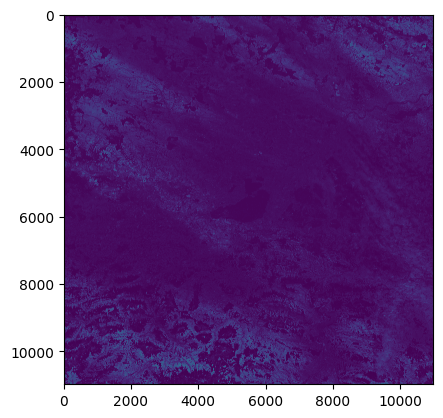

In [5]:
import matplotlib.pyplot as plt

image_band_1 = dataset.read(1)
plt.imshow(image_band_1)
image_band_1

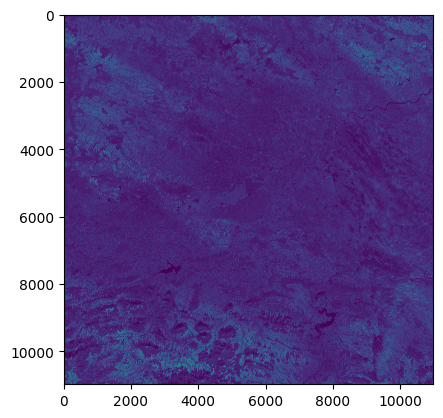

In [6]:
image_band_2 = dataset2.read(1)
plt.imshow(image_band_2)

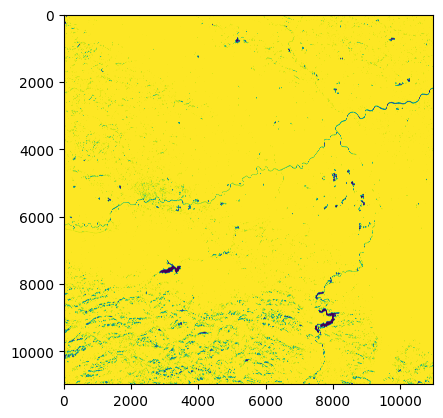

In [9]:
import numpy as np
image_band_1_norm = image_band_1 / np.max(np.abs(image_band_1))
image_band_2_norm = image_band_2 / np.max(np.abs(image_band_2))
image_ndwi = (image_band_1_norm - image_band_2_norm) // (image_band_1_norm + image_band_2_norm + np.ones((image_band_1_norm.shape[0], image_band_1_norm.shape[1])))
plt.imshow(image_ndwi.astype('uint16'))
